In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
%matplotlib inline 

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [2]:
# data
x1 = [ -4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2 ]
x2 = [ -3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5 ]

print('Datapoints defined!')

Datapoints defined!


In [3]:
colors_map = np.array([ 'b', 'r' ])

def assign_members(x1, x2, centers):
    #Euclidean distance to first center point 1
    compare_to_first_center  = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    
    #Euclidean distance to second center point 2
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    
    #Check which data points are closet to which centers and return boolean. Return true for closet center
    class_of_points = compare_to_first_center > compare_to_second_center
    
    # colors assigned according to center point assigned (+1 -1 to convert boolean to numeric)
    colors = colors_map[class_of_points + 1 - 1]
    
    
    #return colors and nearest center points assigned to each data points (marked True)
    return colors, class_of_points


In [4]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = [ 'bx', 'rx' ]
    
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


In [5]:
# update centers for more accuracy to assign data points to cluster
def update_centers(x1, x2, class_of_points):
    #center1 updated to MEAN of data points assigned to cluster1
    center1 = [ np.mean(np.array(x1) [ ~class_of_points ]), np.mean(np.array(x2) [ ~class_of_points ]) ]
    
    #center2 updated to MEAN of data points assigned to cluster2
    center2 = [ np.mean(np.array(x1) [ class_of_points  ]), np.mean(np.array(x2) [ class_of_points  ]) ]
    
    return [ center1, center2 ]

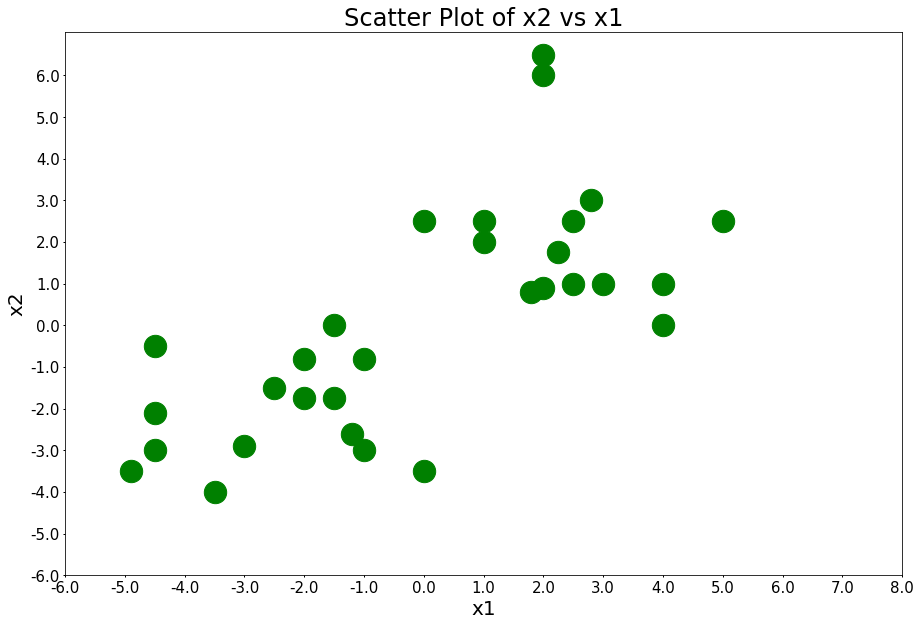

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

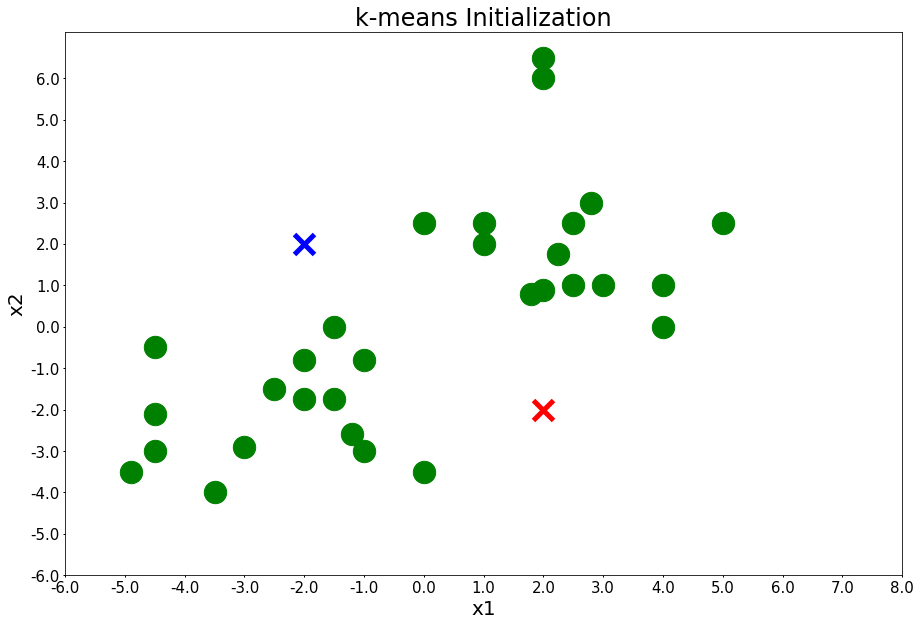

In [7]:
#plot data points with initialized centers
centers = [
    [-2, 2], 
    [2, -2]
]
plot_points(centers, figure_title='k-means Initialization')

In [8]:
# Assign data points to updated on initialized centers
colors, class_of_points = assign_members(x1, x2, centers)

#### Assign data points to updated on initialized centers
colors, class_of_points = assign_members(x1, x2, centers)
plot_points(centers, colors, figure_title='Initial Cluster Assignment')

No of iteration to run for updation of centroids to optimal 10


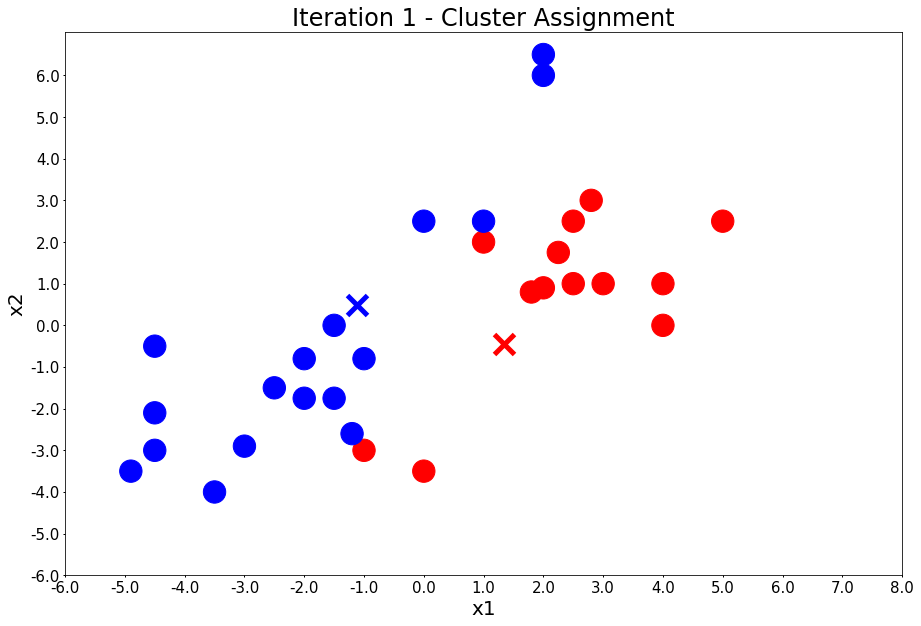

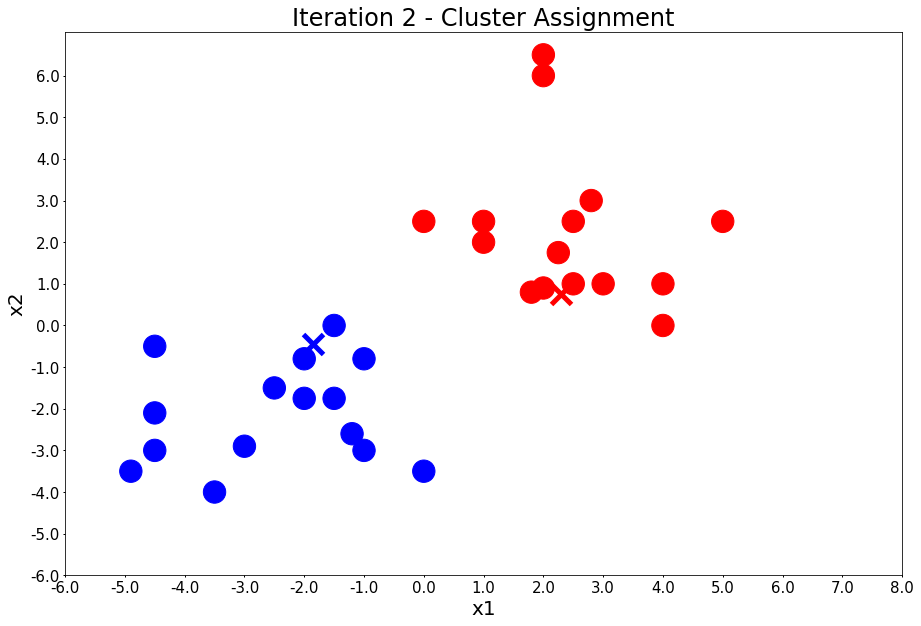

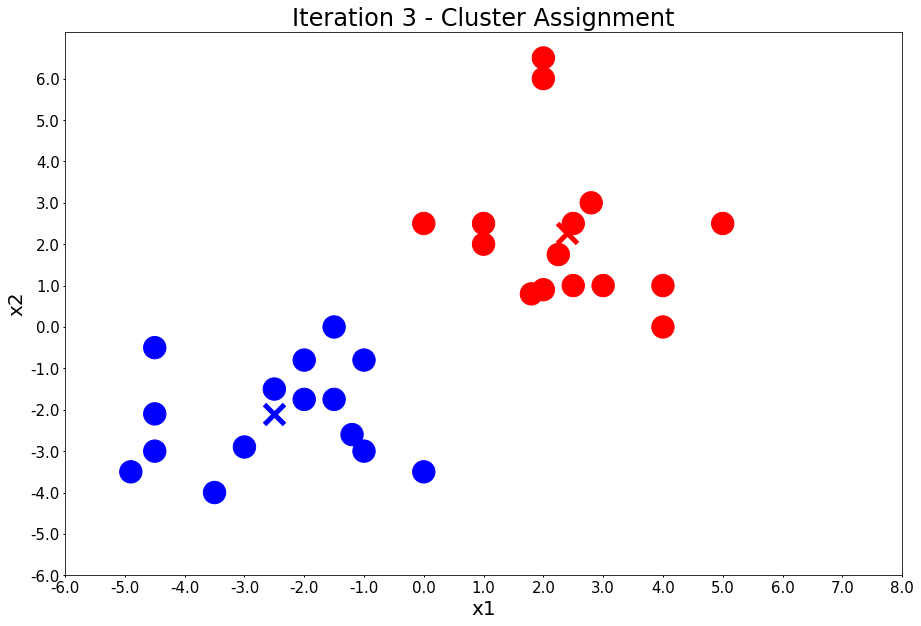

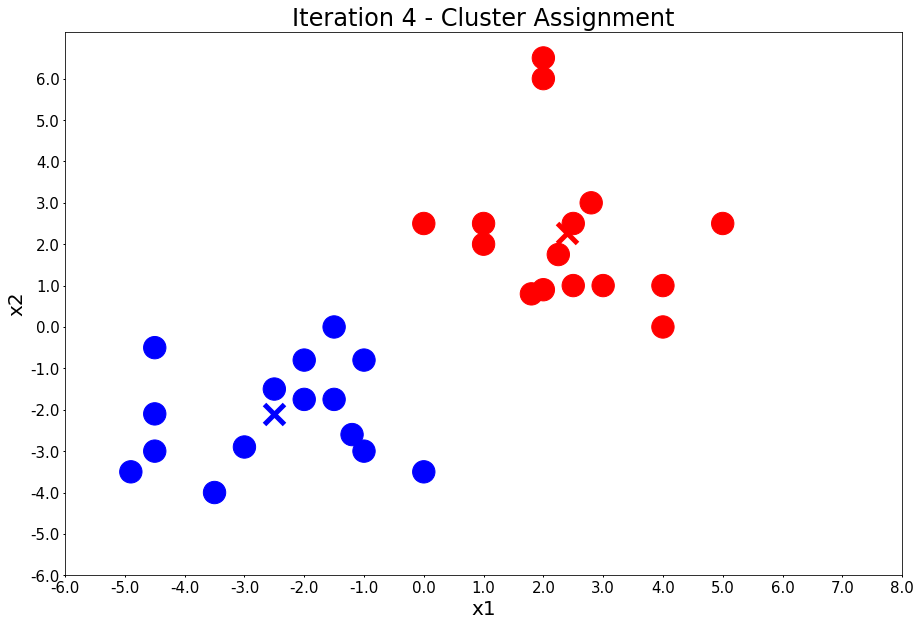

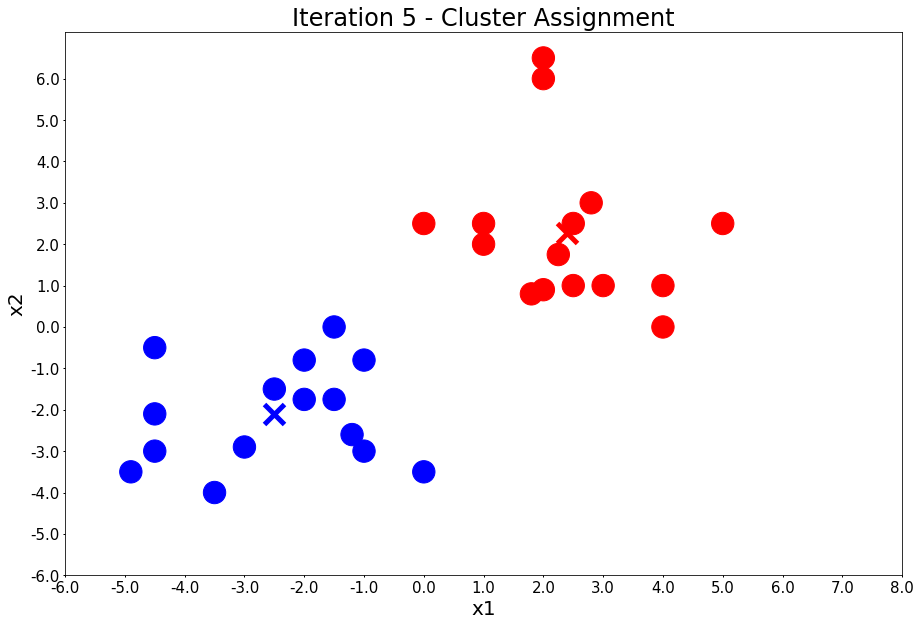

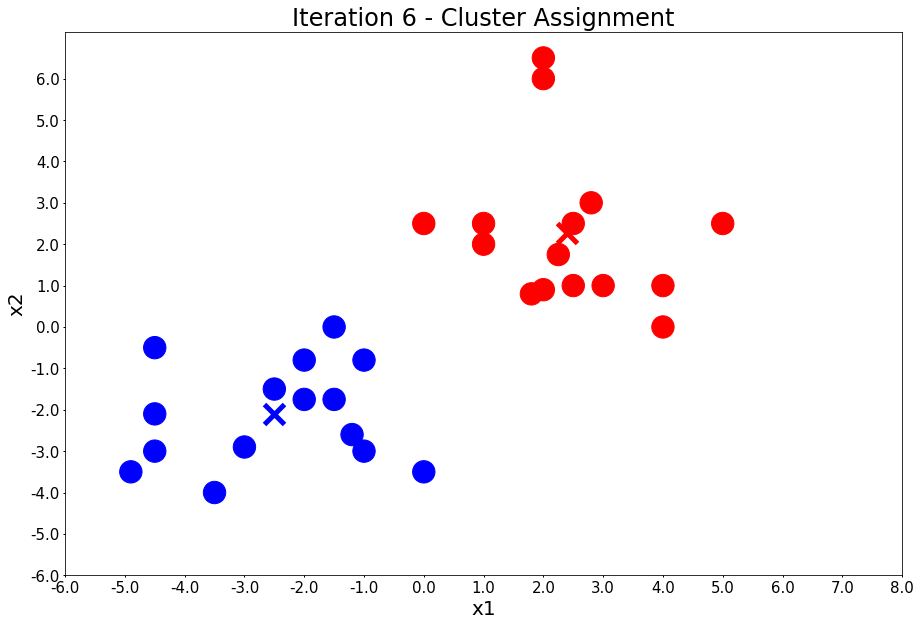

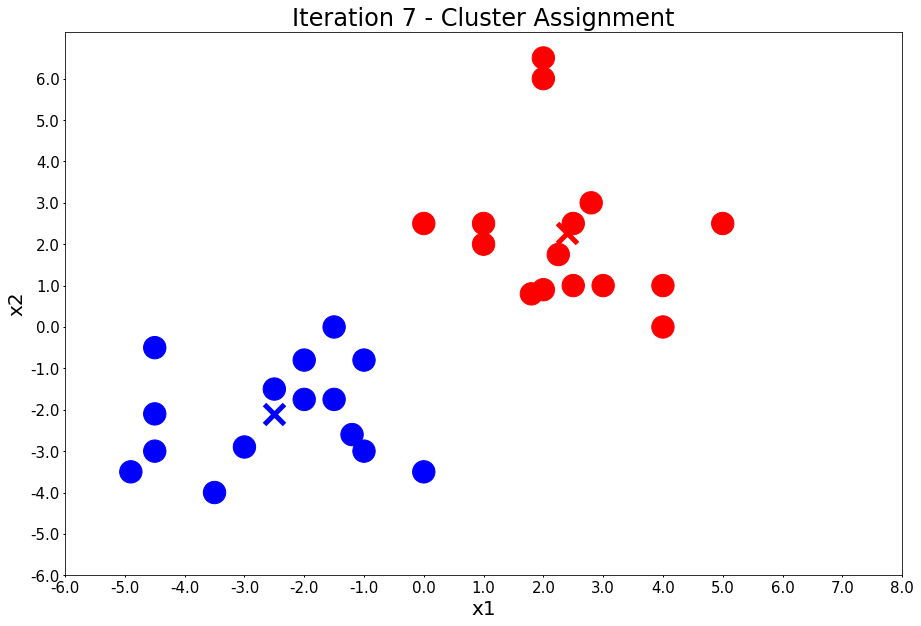

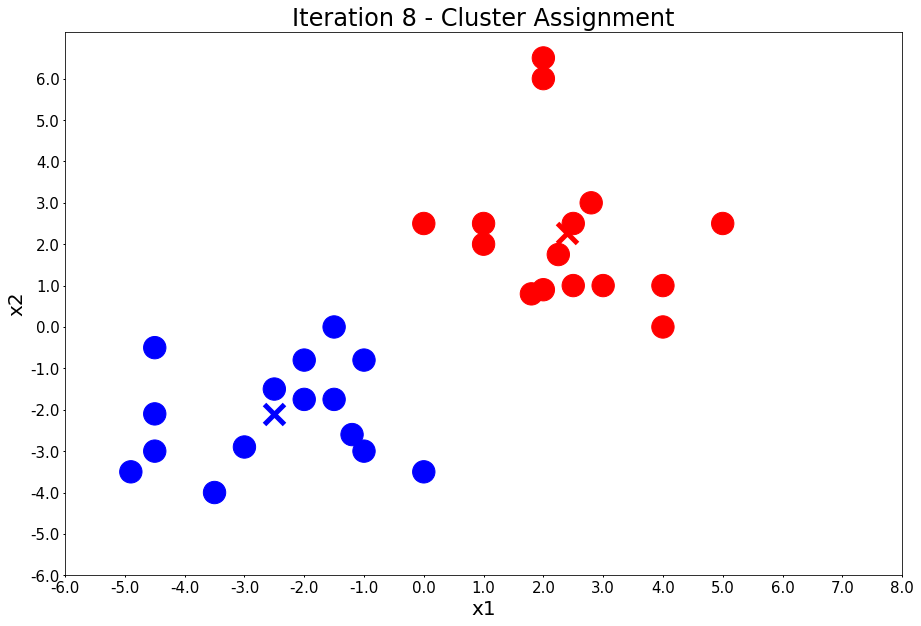

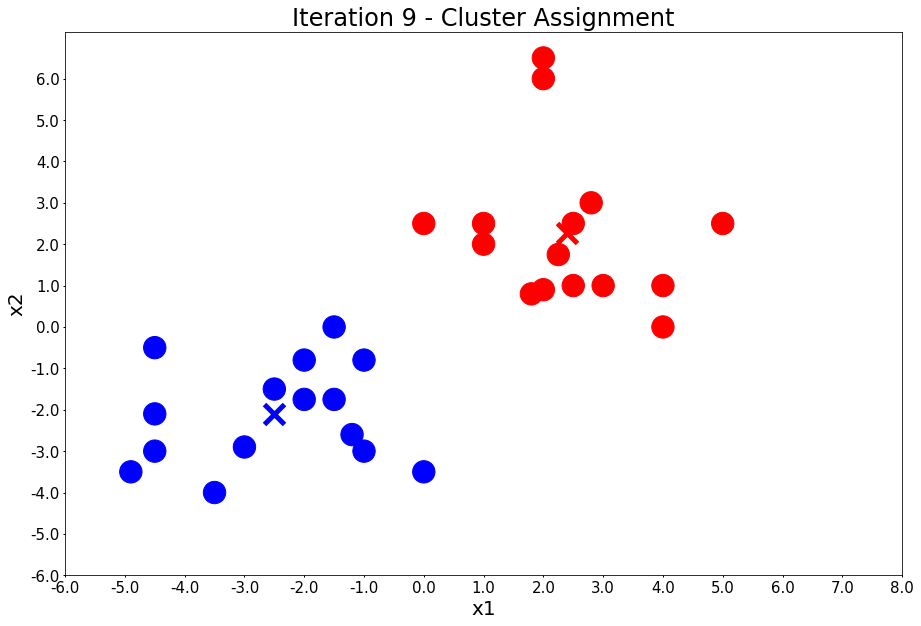

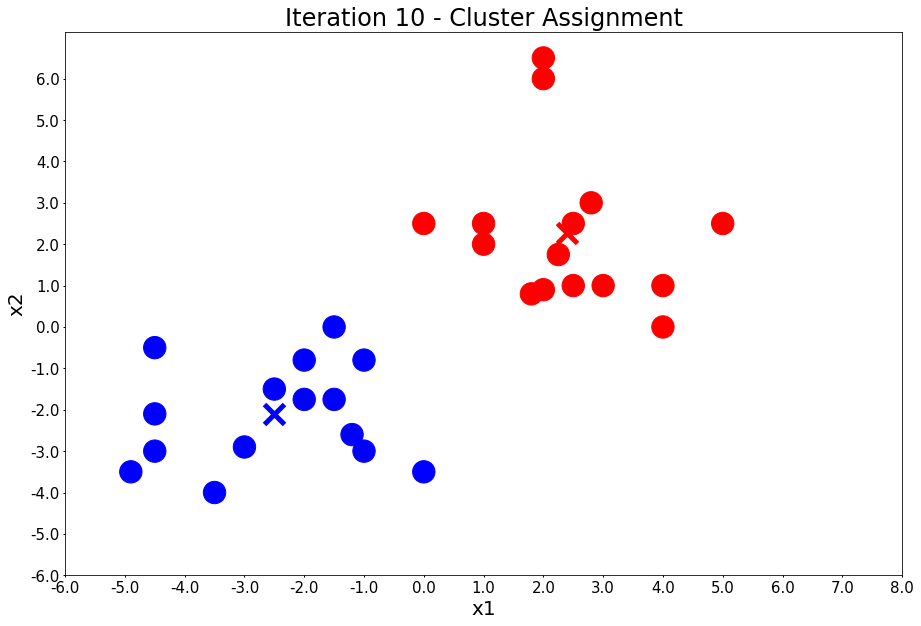

In [9]:
#run iteration upto 4 to find good centers to assign clusters
iterations = int(input('No of iteration to run for updation of centroids to optimal '))
      
for i in range(iterations):
    #Set title
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    
    # update centroid for optized clustering
    centers = update_centers(x1, x2, class_of_points)
    
    # Assign data points to updated on initialized centers
    colors, class_of_points = assign_members(x1, x2, centers)
    
    #Plot points to updated data points cluster and centers
    plot_points(centers, colors, figure_title=title)
    